In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import train_test_split # module to split our data into train and test sets

import statsmodels.api as sm
import statsmodels.tools 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Import Data

In [40]:
cars = pd.read_csv('data/cars_used.csv')
cars.head()

,Unnamed: 0,model,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year
0,0,Astra,995,85405.0,103.0,Manual,Petrol,4,Hatchback,Yes,1.6,2005.0
1,1,Astra,1350,84000.0,103.0,Manual,Petrol,3,Hatchback,Yes,1.6,2005.0
2,4,Astra,1695,64000.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
3,5,Astra,1649,96793.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
4,6,Astra,880,127101.0,103.0,Automatic,Petrol,5,Hatchback,Yes,1.6,2005.0


Drop Unnamed Column

In [41]:
cars.drop(columns = ['Unnamed: 0'], inplace = True)
cars.head()

,model,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year
0,Astra,995,85405.0,103.0,Manual,Petrol,4,Hatchback,Yes,1.6,2005.0
1,Astra,1350,84000.0,103.0,Manual,Petrol,3,Hatchback,Yes,1.6,2005.0
2,Astra,1695,64000.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
3,Astra,1649,96793.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
4,Astra,880,127101.0,103.0,Automatic,Petrol,5,Hatchback,Yes,1.6,2005.0


## Correlation between Features

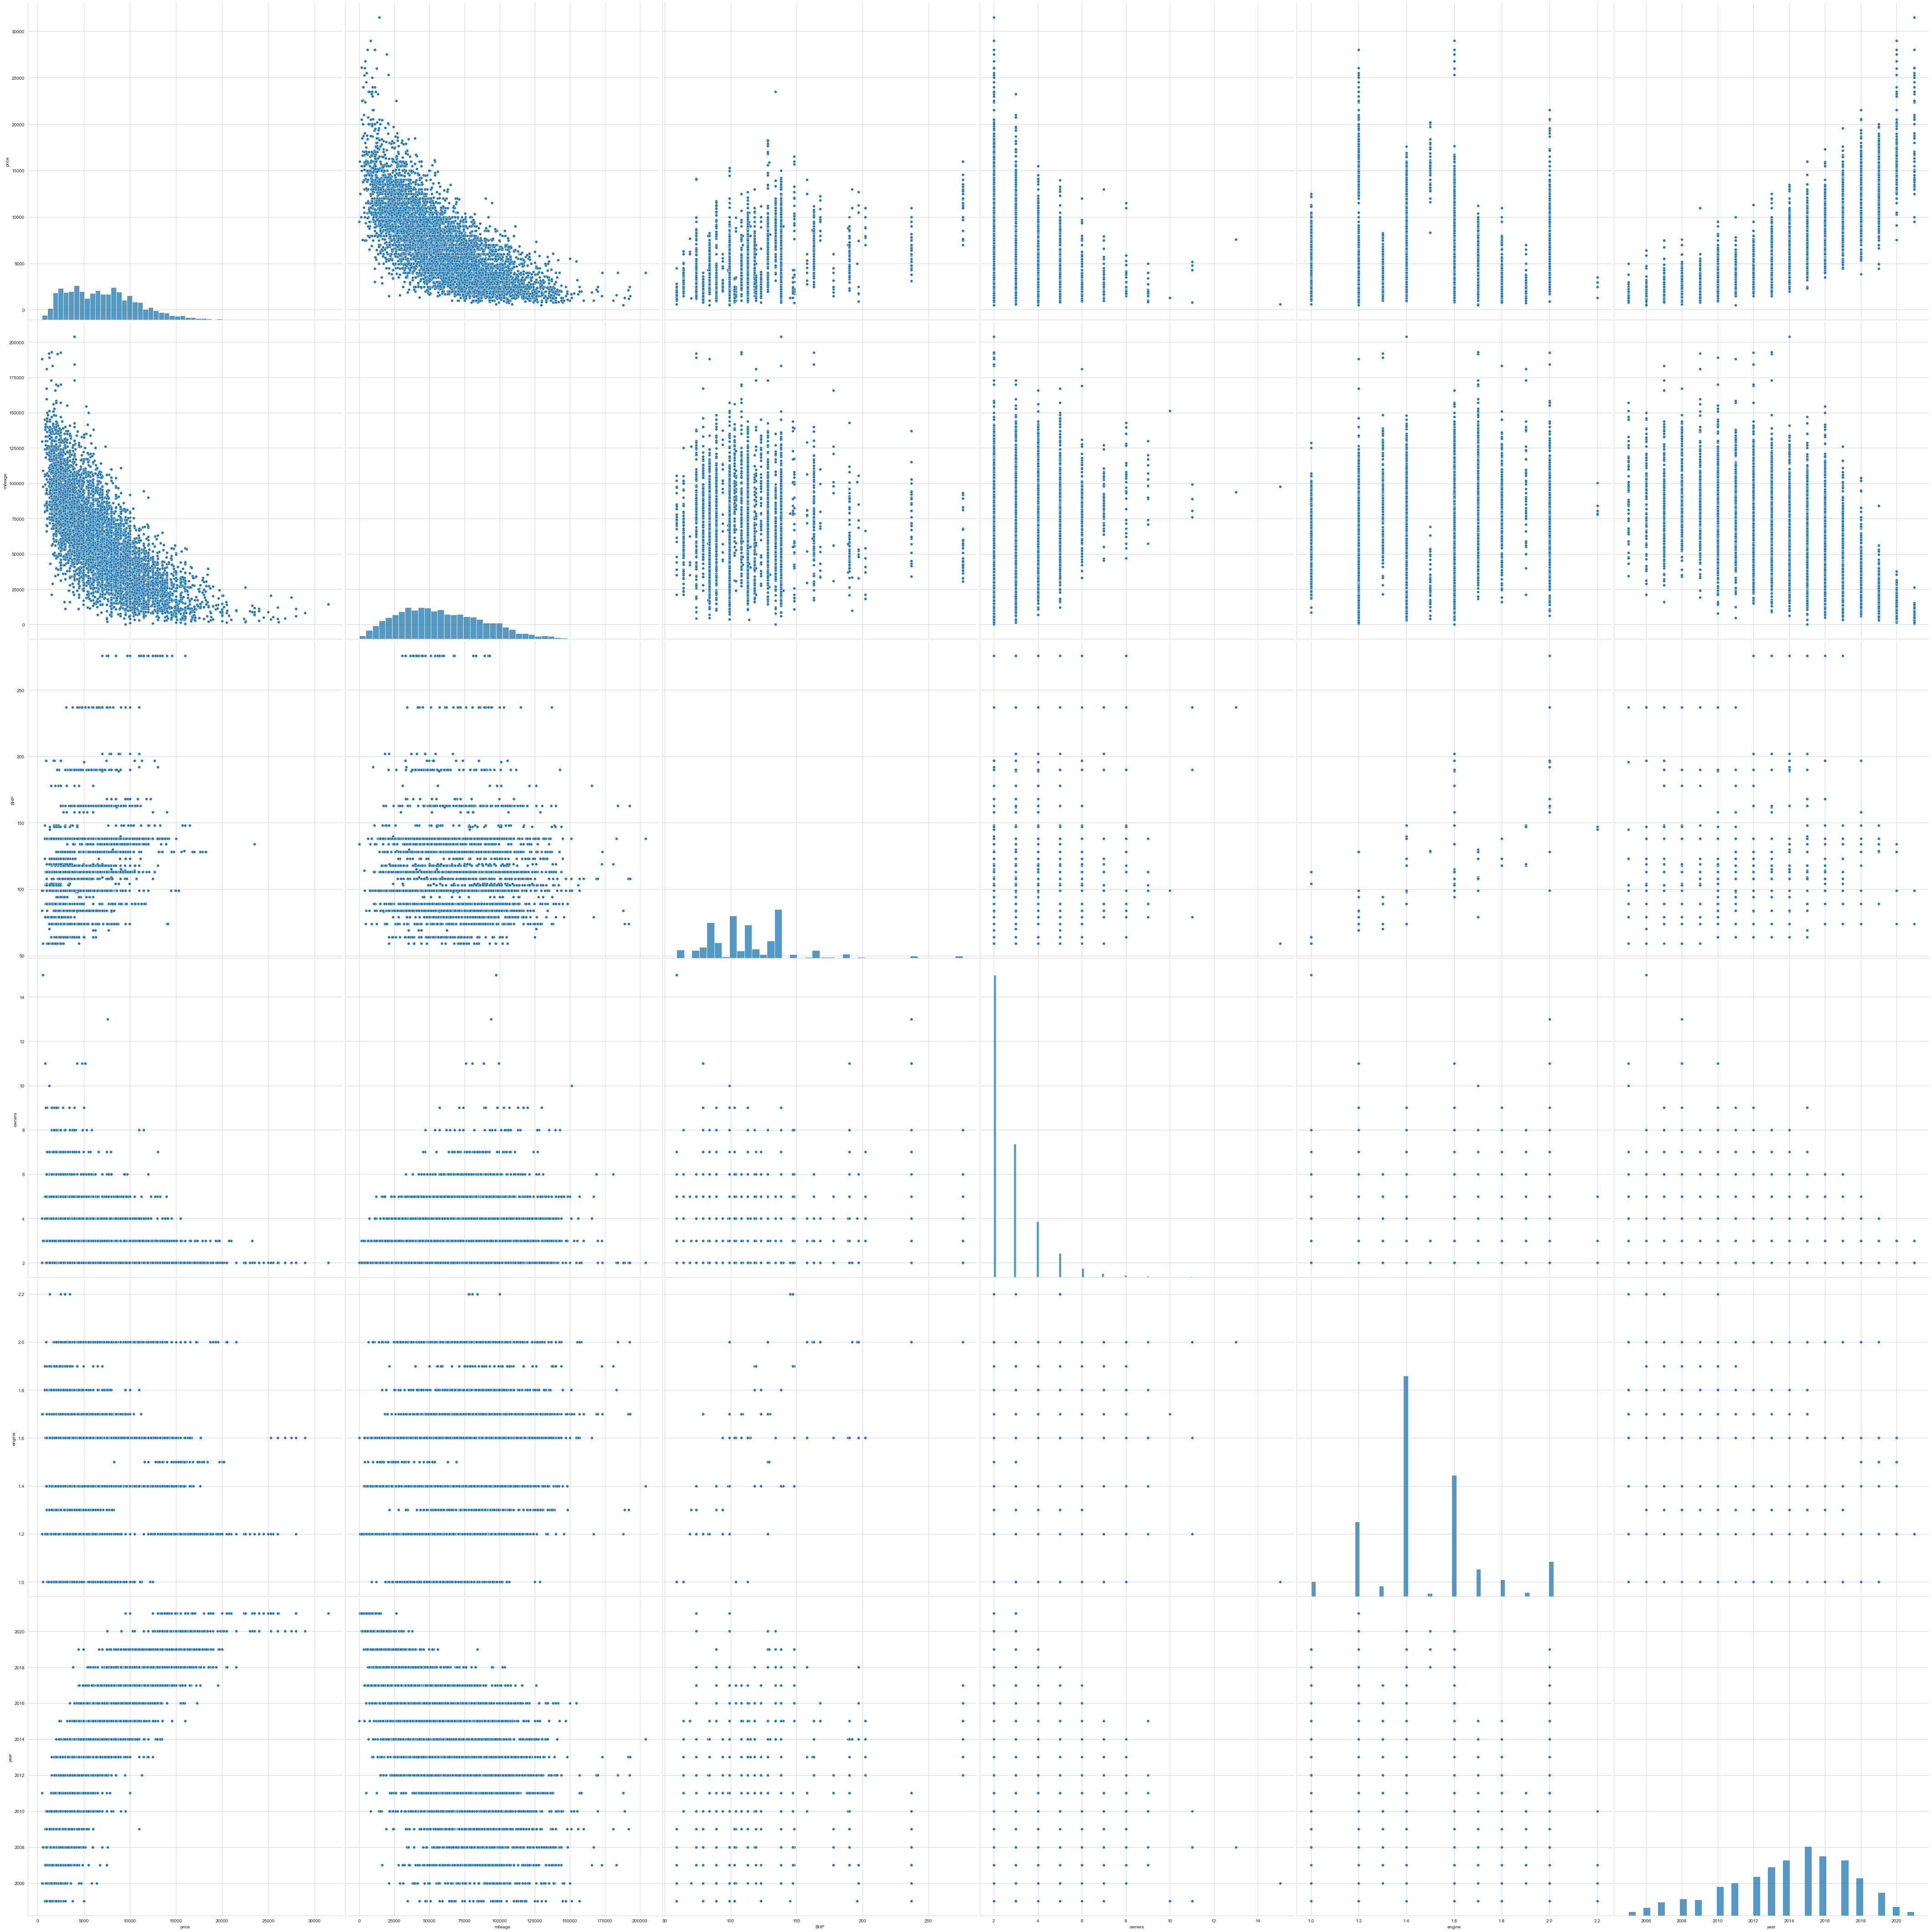

In [42]:
sns.pairplot(cars, height = 10)
plt.show()

Percentage of null values in each column 

In [43]:
cars.isnull().mean().round(4) * 100

model            0.00
price            0.00
mileage          0.03
BHP             50.01
transmission     0.01
fuel             0.00
owners           0.00
body             0.00
ULEZ             0.00
engine           0.20
year             1.41
dtype: float64

Remove rows containing null values

In [44]:
cols_to_drop = ['transmission','engine','mileage','year']
print(cars.shape)

cars.dropna(
    axis = 0, # default
    how = 'any', # default
    subset = cols_to_drop,   # subset tells dropna which columns to consider
    inplace = True # makes change permanent
)
# null value percentage after removing
cars.isnull().mean().round(4) * 100

(7363, 11)


model            0.00
price            0.00
mileage          0.00
BHP             49.95
transmission     0.00
fuel             0.00
owners           0.00
body             0.00
ULEZ             0.00
engine           0.00
year             0.00
dtype: float64

Find unique values of categorical columns 

In [45]:
cols = cars.select_dtypes(include=['object']).columns.tolist()
for col in cols:
    print(cars[col].unique())

['Astra' 'Gtc' 'Corsa' 'Grandland_x' 'Mokka' 'Meriva' 'Zafira']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'Petrol Plug-in Hybrid']
['Hatchback' 'Estate' 'Convertible' 'Coupe' 'SUV' 'MPV']
['Yes' 'No']


## Feature Engineering



In [46]:
cars.groupby('model')['BHP'].transform(lambda x: x.fillna(round(x.mode(),2))).reset_index()

,index,BHP
0,0,103.0
1,1,103.0
2,2,123.0
3,3,123.0
4,4,103.0
...,...,...
7236,7358,138.0
7237,7359,NaN
7238,7360,138.0
7239,7361,NaN


In [47]:
def feature_eng1(df):
        """
        performs basic feature engineering
        """

        cols_to_drop = ['mileage','BHP','owners','year']
        
        df.dropna(
        axis = 0, # default
        how = 'any', # default
        subset = cols_to_drop,   # subset tells dropna which columns to consider
        inplace = True # makes change permanent
        )

        return df

In [48]:
def feature_eng2(df):

        """
        function to perform second level feature engineering by perfroming scaling
        on selected columns
        i/p : df
        o/p: df 

        print(df.columns)
        """

        df.year = cars['year'].astype('int')

        
        #BHP
        df['BHP'] = df.groupby('model')['BHP'].transform(lambda x: x.fillna(round(x.mode(),2)))
        df['BHP'] = df['BHP'].round(decimals = 2)

        # # owners
        # df['owners'] = df.groupby('model')['owners'].transform(lambda x: x.fillna(x.mode()))

        #year
        df['year'] = df.groupby('model')['year'].transform(lambda x: x.fillna(x.mode()))

        # # scaling
        st_scaler = StandardScaler()

        col_transformer = ColumnTransformer(verbose = True, transformers = [('ss', st_scaler, ['mileage', 'BHP'])])
        depth_transform = col_transformer.fit_transform(df)
        df_scaled = pd.DataFrame(depth_transform,index=df.index, columns =['mileage', 'BHP'])
        df_scaled.head()

        df[['mileage', 'BHP']]  = df_scaled


        # ohe
        cols_to_ohe = ['model','fuel','ULEZ','transmission','engine','body','year']

        for col in cols_to_ohe:

                df = pd.get_dummies(df, columns = [col], drop_first = True, prefix = col)

        df = sm.add_constant(df)

        return df


In [49]:
print(cars.columns)

Index(['model', 'price', 'mileage', 'BHP', 'transmission', 'fuel', 'owners',
       'body', 'ULEZ', 'engine', 'year'],
      dtype='object')


In [50]:
cars.isnull().mean().round(4) * 100

model            0.00
price            0.00
mileage          0.00
BHP             49.95
transmission     0.00
fuel             0.00
owners           0.00
body             0.00
ULEZ             0.00
engine           0.00
year             0.00
dtype: float64

Basic feature engineering

In [51]:
cars = feature_eng1(cars)
cars.head()

,model,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year
0,Astra,995,85405.0,103.0,Manual,Petrol,4,Hatchback,Yes,1.6,2005.0
1,Astra,1350,84000.0,103.0,Manual,Petrol,3,Hatchback,Yes,1.6,2005.0
2,Astra,1695,64000.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
3,Astra,1649,96793.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
4,Astra,880,127101.0,103.0,Automatic,Petrol,5,Hatchback,Yes,1.6,2005.0


## Split train and test data

split into features and dependent variable

In [52]:
feature_cols = list(cars.columns)
feature_cols.remove('price')

# split into features and dependent variable
X = cars[feature_cols]
y = cars['price']

X.head()

,model,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year
0,Astra,85405.0,103.0,Manual,Petrol,4,Hatchback,Yes,1.6,2005.0
1,Astra,84000.0,103.0,Manual,Petrol,3,Hatchback,Yes,1.6,2005.0
2,Astra,64000.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
3,Astra,96793.0,123.0,Automatic,Petrol,5,Estate,Yes,1.8,2005.0
4,Astra,127101.0,103.0,Automatic,Petrol,5,Hatchback,Yes,1.6,2005.0


Train test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)
X_train.head()

X_train shape: (2899, 10)
y_train shape: (2899,)
X_test shape: (725, 10)
y_test shape: (725,)


,model,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year
3242,Corsa,103000.0,84.0,Manual,Petrol,2,Hatchback,Yes,1.2,2012.0
5436,Meriva,26500.0,99.0,Manual,Petrol,4,MPV,Yes,1.4,2014.0
1140,Astra,66234.0,99.0,Manual,Petrol,2,Hatchback,Yes,1.4,2014.0
177,Astra,140000.0,113.0,Manual,Petrol,5,Hatchback,Yes,1.6,2008.0
5498,Meriva,56504.0,99.0,Manual,Petrol,2,MPV,Yes,1.4,2015.0


### Feature Engineer Train Data 



In [55]:
X_train = feature_eng2(X_train)
X_test = feature_eng2(X_test)
X_train.head()

[ColumnTransformer] ............ (1 of 1) Processing ss, total=   0.0s
[ColumnTransformer] ............ (1 of 1) Processing ss, total=   0.0s


,const,mileage,BHP,owners,model_Corsa,model_Grandland_x,model_Meriva,model_Mokka,model_Zafira,fuel_Petrol,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
3242,1.0,1.146220,-0.892517,2,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5436,1.0,-1.441607,-0.435146,4,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1140,1.0,-0.097493,-0.435146,2,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
177,1.0,2.397848,-0.008267,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5498,1.0,-0.426638,-0.435146,2,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [56]:
feature_cols = list(X_train.columns)
X_train.isnull().mean().round(4) * 100

const                  0.0
mileage                0.0
BHP                    0.0
owners                 0.0
model_Corsa            0.0
model_Grandland_x      0.0
model_Meriva           0.0
model_Mokka            0.0
model_Zafira           0.0
fuel_Petrol            0.0
ULEZ_Yes               0.0
transmission_Manual    0.0
engine_1.2             0.0
engine_1.3             0.0
engine_1.4             0.0
engine_1.5             0.0
engine_1.6             0.0
engine_1.7             0.0
engine_1.8             0.0
engine_1.9             0.0
engine_2.0             0.0
engine_2.2             0.0
body_Coupe             0.0
body_Estate            0.0
body_Hatchback         0.0
body_MPV               0.0
body_SUV               0.0
year_2006              0.0
year_2007              0.0
year_2008              0.0
year_2009              0.0
year_2010              0.0
year_2011              0.0
year_2012              0.0
year_2013              0.0
year_2014              0.0
year_2015              0.0
y

In [57]:
X_train.columns

Index(['const', 'mileage', 'BHP', 'owners', 'model_Corsa', 'model_Grandland_x',
       'model_Meriva', 'model_Mokka', 'model_Zafira', 'fuel_Petrol',
       'ULEZ_Yes', 'transmission_Manual', 'engine_1.2', 'engine_1.3',
       'engine_1.4', 'engine_1.5', 'engine_1.6', 'engine_1.7', 'engine_1.8',
       'engine_1.9', 'engine_2.0', 'engine_2.2', 'body_Coupe', 'body_Estate',
       'body_Hatchback', 'body_MPV', 'body_SUV', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021'],
      dtype='object')

## Modelling

In [58]:
def create_model(X_train,features,model_name='model'):
    """
    Function to create model
    i/p:X_train,features,model_name
    o/p:model,rmse
    """

    lin_reg = sm.OLS(y_train, X_train[features])
    model = lin_reg.fit()

    X_train['y_pred'] = model.predict(X_train[features])

    rmse = statsmodels.tools.eval_measures.rmse(y_train, X_train['y_pred'])
    
    # save model in models directory
    model.save("models/"+model_name+".pickle")

    return model,rmse

Column Groupings

In [59]:
all_cols = {'const', 'mileage', 'BHP', 'owners', 'model_Corsa', 'model_Grandland_x',
       'model_Meriva', 'model_Mokka', 'model_Zafira', 'ULEZ_Yes',
       'transmission_Manual', 'fuel_Petrol', 'engine_1.2', 'engine_1.3',
       'engine_1.4', 'engine_1.5', 'engine_1.6', 'engine_1.7', 'engine_1.8',
       'engine_1.9', 'engine_2.0', 'engine_2.2', 'body_Coupe', 'body_Estate',
       'body_Hatchback', 'body_MPV', 'body_SUV', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021'}



name_col =  {'model_Corsa', 'model_Grandland_x','model_Meriva', 'model_Mokka', 'model_Zafira'}

fuel_cols = {'fuel_Petrol','fuel_Petrol Plug-in Hybrid'}

engine_cols = {'engine_1.2', 'engine_1.3', 'engine_1.4',
       'engine_1.5', 'engine_1.6', 'engine_1.7', 'engine_1.8', 'engine_1.9',
       'engine_2.0', 'engine_2.2'}
body_cols = {'body_Coupe', 'body_Estate',
       'body_Hatchback', 'body_MPV', 'body_SUV'}

ulez_col = {'ULEZ_1'}

mileage_col={'mileage'}

year_col={'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020',
       'year_2021'}

owners_col ={'owners'}





## Modelling

Model using all columns

In [60]:

model,rmse = create_model(X_train=X_train,features=list(all_cols),model_name='all')
# retrieve sssr
ssr = model.ssr
print('rmse:',rmse,'ssr:',ssr)



models_rmse={'all':rmse}
models_ssr={'all':ssr}



model.summary()

rmse: 841.2583542463767 ssr: 2051667578.2904449


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     859.7
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:09:38   Log-Likelihood:                -23638.
No. Observations:                2899   AIC:                         4.736e+04
Df Residuals:                    2858   BIC:                         4.760e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
engine_1.2            208.5161     97.233      2.145      0.032      17.862     399.170
engine_1.3            874.0845    203.311      4.299      0.000     475.433    1272.736
engine_1.9           -758.2663    258.431     -2.934      0.003   -1264.996    -251.536
model_Zafira          812.6085     60.215     13.495      0.000     694.539     930.678
model_Meriva         -462.9837     69.711     -6.642      0.000    -599.672    -326.295
year_2008             316.8553    144.687      2.190      0.029      33.154     600.557
fuel_Petrol           -10.9626     89.545     -0.122      0.903    -186.542     164.617
transmission_Manual  -993.5337     50.008    -19.867      0.000   -1091.590    -895.478
model_Mokka          -160.9520    128.558     -1.252      0.211    -413.028      91.124
year_2017            5385.3396    186.187     28.924      0.000    5020.265    5750.414
engine_1.5            992.8835    610.549      1.626      0.104    -204.278    2190.045
body_SUV             1829.9615    155.752     11.749      0.000    1524.563    2135.360
year_2021            9570.7405    860.376     11.124      0.000    7883.721    1.13e+04
year_2018            6168.0374    207.191     29.770      0.000    5761.778    6574.296
mileage             -1014.3627     19.832    -51.148      0.000   -1053.249    -975.476
BHP                   802.0752     32.174     24.929      0.000     738.989     865.162
engine_2.0             -1.4172    212.003     -0.007      0.995    -417.112     414.278
body_Hatchback        600.1917    156.579      3.833      0.000     293.173     907.211
year_2014            2774.1781    141.513     19.604      0.000    2496.700    3051.657
year_2006             -24.7237    155.828     -0.159      0.874    -330.270     280.822
engine_1.8          -1153.2208    142.452     -8.095      0.000   -1432.540    -873.901
body_Estate           731.6760    170.854      4.282      0.000     396.667    1066.685
year_2016            4360.2847    156.590     27.845      0.000    4053.244    4667.326
engine_1.7             68.1293    208.491      0.327      0.744    -340.679     476.938
body_Coupe           1711.8197    244.403      7.004      0.000    1232.596    2191.043
year_2010             825.0180    142.874      5.774      0.000     544.871    1105.165
year_2009             554.6334    145.354      3.816      0.000     269.623     839.644
year_2015            3732.0875    148.420     25.145      0.000    3441.066    4023.109
const                3253.8264    301.952     10.776      0.000    2661.760    3845.892
year_2012            1599.6338    141.795     11.281      0.000    1321.603    1877.665
owners                -46.2505     13.567     -3.409      0.001     -72.853     -19.649
engine_1.6           -372.1864    117.977     -3.155      0.002    -603.515    -140.858
eng

Function to plot correlation

In [61]:
def plot_correlation(corr):
    """
    plots a correlation matrix 
    i/p: corr
    """


    plt.figure(figsize = (20,12)) # setting the size of the output

    sns.heatmap(corr,
                annot = True,
                linecolor='black',
                center=0,
                vmin=-1,
                vmax=1,
                cmap = sns.diverging_palette(600,600, as_cmap=True),
                fmt='.4g')

    plt.title('Correlation matrix of feature columns') # naming the plot


    plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_13604\567660174.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_corr = X_train[all_cols].corr()


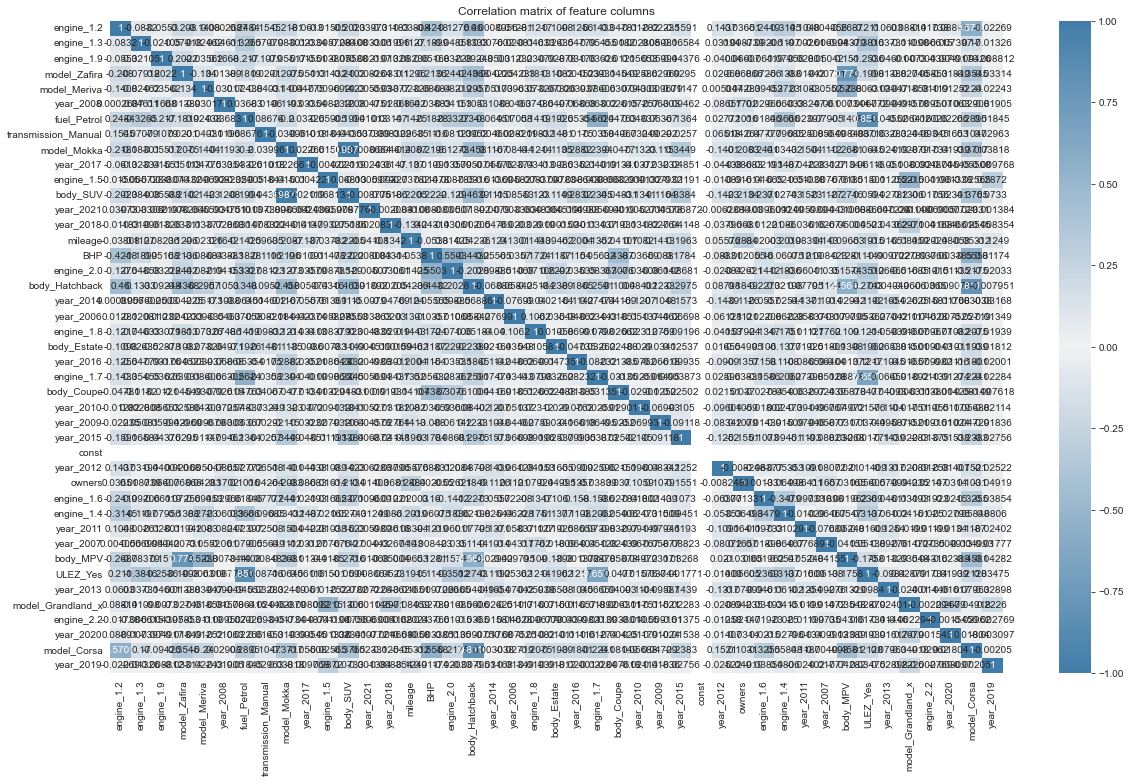

In [62]:
train_corr = X_train[all_cols].corr()


plot_correlation(train_corr)

Non-Collinear columns

In [63]:
non_collinear_cols = {'const','year_2021', 'engine_2.2', 'year_2014', 'year_2015', 'engine_1.8',
       'mileage', 'year_2017', 'year_2008', 'body_Coupe', 'year_2011',
       'model_Mokka', 'engine_1.6', 'year_2006', 'engine_1.2', 'engine_2.0',
       'engine_1.3', 'year_2007', 'body_MPV', 'year_2012', 'year_2019',
       'year_2016', 'year_2013', 'model_Meriva', 'year_2009', 'engine_1.5',
       'body_Estate', 'year_2010', 'BHP', 'engine_1.7', 'year_2020',
       'year_2018'}  



In [64]:
colinear_cols = all_cols - non_collinear_cols
colinear_cols
for col in colinear_cols:
    
    col = {col}
    cols = non_collinear_cols.union(col)

    model,rmse = create_model(X_train=X_train,features=list(cols))
    ssr = model.ssr
    print(col,'rmse:',rmse,'ssr:',ssr)

{'engine_1.4'} rmse: 927.363819070252 ssr: 2493150589.8167124
{'body_SUV'} rmse: 912.9837010942156 ssr: 2416430252.306243
{'fuel_Petrol'} rmse: 929.4087520254743 ssr: 2504158021.5621524
{'body_Hatchback'} rmse: 930.7770798520056 ssr: 2511536973.92332
{'ULEZ_Yes'} rmse: 926.7058368834731 ssr: 2489613969.822191
{'engine_1.9'} rmse: 925.8793168998177 ssr: 2485175024.932869
{'model_Zafira'} rmse: 930.8157908817733 ssr: 2511745887.972542
{'transmission_Manual'} rmse: 875.9371702788236 ssr: 2224303920.2743354
{'model_Grandland_x'} rmse: 912.9837010942156 ssr: 2416430252.306243
{'owners'} rmse: 927.6561949567063 ssr: 2494722900.504467
{'model_Corsa'} rmse: 927.3960107452538 ssr: 2493323682.8032656


Find common train and test columns

In [65]:
non_collinear_cols = {'const','year_2021', 'engine_2.2', 'year_2014', 'year_2015', 'engine_1.8',
       'mileage', 'year_2017', 'year_2008', 'body_Coupe', 'year_2011',
       'model_Mokka', 'engine_1.6', 'year_2006', 'engine_1.2', 'engine_2.0',
       'engine_1.3', 'year_2007', 'body_MPV', 'year_2012', 'year_2019',
       'year_2016', 'year_2013', 'model_Meriva', 'year_2009', 'engine_1.5',
       'body_Estate', 'year_2010', 'BHP', 'engine_1.7', 'year_2020',
       'year_2018'}  

non_collinear_cols = non_collinear_cols-{'year_2006','year_2008','year_2007','engine_1.2','engine_2.0'}

test_cols = set(X_test.columns)



Model based on non-collinear features

In [66]:
non_collinear_cols = test_cols.intersection(non_collinear_cols)


model,rmse = create_model(X_train=X_train,features=list(non_collinear_cols),model_name='non_collinear_cols')
ssr = model.ssr
print('rmse:',rmse,'ssr:',ssr)
model.summary()


models_rmse['non_collinear_cols'] = rmse
models_ssr['non_collinear_cols']=ssr


model.summary()

rmse: 957.8319333993347 ssr: 2659664394.6419325


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1084.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:09:51   Log-Likelihood:                -24014.
No. Observations:                2899   AIC:                         4.808e+04
Df Residuals:                    2874   BIC:                         4.823e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
engine_1.3     289.9512    107.444      2.699      0.007      79.276     500.627
model_Meriva -1035.3812     80.145    -12.919      0.000   -1192.530    -878.233
year_2017     5284.7468    151.336     34.921      0.000    4988.009    5581.485
model_Mokka   1310.3243     70.551     18.573      0.000    1171.989    1448.659
year_2018     6605.4220    172.801     38.226      0.000    6266.595    6944.249
mileage      -1086.6507     21.548    -50.430      0.000   -1128.901   -1044.400
BHP            825.7767     23.902     34.549      0.000     778.911     872.643
year_2014     2543.0169     72.309     35.169      0.000    2401.233    2684.801
engine_1.8    -881.0916     82.063    -10.737      0.000   -1042.000    -720.183
body_Estate    480.2907     86.501      5.552      0.000     310.680     649.901
year_2016     4239.0565     97.940     43.282      0.000    4047.017    4431.096
engine_1.7    -209.3483     73.764     -2.838      0.005    -353.984     -64.713
body_Coupe    1116.2961    210.926      5.292      0.000     702.714    1529.878
year_2010      665.2486     80.265      8.288      0.000     507.865     822.632
year_2009      361.6841     87.181      4.149      0.000     190.741     532.628
year_2015     3555.8850     84.580     42.042      0.000    3390.041    3721.729
const         3195.9295     52.266     61.148      0.000    3093.448    3298.411
year_2012     1371.7826     74.294     18.464      0.000    1226.107    1517.458
year_2011     1003.0181     76.028     13.193      0.000     853.943    1152.094
engine_1.6    -344.0047     50.284     -6.841      0.000    -442.601    -245.408
body_MPV       630.8726     58.465     10.791      0.000     516.236     745.509
year_2013     1906.1935     71.856     26.528      0.000    1765.299    2047.088
engine_2.2   -1346.8159    485.614     -2.773      0.006   -2299.003    -394.629
year_2020     1.111e+04    436.362     25.453      0.000    1.03e+04     1.2e+04
year_2019     7613.6552    251.816     30.235      0.000    7119.897    8107.413
==============================================================================
Omnibus:                      413.220   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2967.558
Skew:                           0.463   Prob(JB):                         0.00
Kurtosis:                       7.869   Cond. No.                         30.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Testing

In [67]:
# filter test data using the columns
X_test = X_test[list(non_collinear_cols)]
print(X_test.shape)
X_test.head()

(725, 25)


,engine_1.3,model_Meriva,year_2017,model_Mokka,year_2018,mileage,BHP,year_2014,engine_1.8,body_Estate,...,year_2015,const,year_2012,year_2011,engine_1.6,body_MPV,year_2013,engine_2.2,year_2020,year_2019
1565,0,0,0,0,0,-1.082587,0.673832,0,0,0,...,0,1.0,0,0,1,0,0,0,0,0
3225,1,0,0,0,0,0.315880,-1.231877,0,0,0,...,0,1.0,1,0,0,0,0,0,0,0
6988,0,0,0,0,0,0.132501,0.165643,1,1,0,...,0,1.0,0,0,0,1,0,0,0,0
3173,0,0,0,0,0,0.870419,-0.914258,0,0,0,...,0,1.0,1,0,0,0,0,0,0,0
3439,0,0,0,0,0,-0.036906,-0.914258,0,0,0,...,0,1.0,0,0,0,0,1,0,0,0


Compute test rmse

In [68]:

X_test['y_pred'] = model.predict(X_test)
rmse = statsmodels.tools.eval_measures.rmse(y_test, X_test['y_pred'])
print('Test Rmse:',rmse)

Test Rmse: 926.7996670499689


# Testing using single input

In [69]:

# or more generally
from statsmodels.iolib.smpickle import load_pickle


model = load_pickle("models/non_collinear_cols.pickle")


### Test Data

In [74]:
def predict_price(car_input):
    
    df = pd.DataFrame([car_input])

    condition = df['Condition'][0]

    cols_to_drop = ['make','writeoff','Condition']

    df.drop(columns = cols_to_drop, inplace = True,axis=1)

    cols_to_ohe = ['model','fuel','ULEZ','transmission','engine','body','year']

    df_ohe = pd.get_dummies(df,columns=cols_to_ohe)
    df_ohe = sm.add_constant(df_ohe)

    test_ohe = df_ohe.reindex(columns= non_collinear_cols, fill_value=0)



    price = abs(model.predict(test_ohe))[0]

    if condition.lower()== 'no damage':
            price=price*0.8
    elif condition.lower()== 'moderate damage':
        price=price*0.5
    elif condition.lower()== 'heavy damage':
        price=price*0.3
    return (f"predicted price for {car_input['model']} is £{round(price,2)}")

In [75]:
car_input = {'make': 'Vauxhall',
             'model':'Corsa',
             'year':'2019',
             'writeoff':'',
             'mileage':40000,
             'BHP':100,
             'transmission':'Manual',
             'fuel':'Petrol',
             'owners':2,
             'body':'Hatchback',
             'ULEZ':'Yes',
             'engine':'1.4',
             'Condition':'No damage',
            }

price = predict_price(car_input)
price

'predicted price for Corsa is £34700669.0'